# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  
---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [ ]:
# COMPLETAR: importa las librerías necesarias (yfinance, pandas, numpy, matplotlib, seaborn)
# Ejemplo: import yfinance as yf

# COMPLETAR AQUÍ

In [1]:
import yfinance as yf # Para descargar datos financieros
import pandas as pd  # Para manejar datos en tablas
import numpy as np # Para cálculos numéricos
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para visualizaciones avanzada

## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?

In [5]:
# COMPLETAR: descarga los precios de las acciones usando yf.download

acciones = ["GOOG", "AMZN", "MSFT"]
datos = yf.download(tickers=acciones)["Close"]
datos.head() # Veo los primeros 5 datos

/tmp/ipython-input-2879725967.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones)["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOG,MSFT
Date,,,
2025-08-18,231.490005,204.107559,516.251282
2025-08-19,228.009995,202.309189,508.933350
2025-08-20,223.809998,200.011230,504.890015
2025-08-21,221.949997,200.440842,504.239990
2025-08-22,228.839996,206.535400,507.230011


In [6]:
datos.tail() # Veo los últimos 5 datos

Ticker,AMZN,GOOG,MSFT
Date,,,
2025-09-12,228.149994,241.380005,509.899994
2025-09-15,231.429993,251.759995,515.359985
2025-09-16,234.050003,251.419998,509.040009
2025-09-17,231.619995,249.850006,510.019989
2025-09-18,231.869995,252.158798,509.589996


## 3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 **Pregunta:** ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

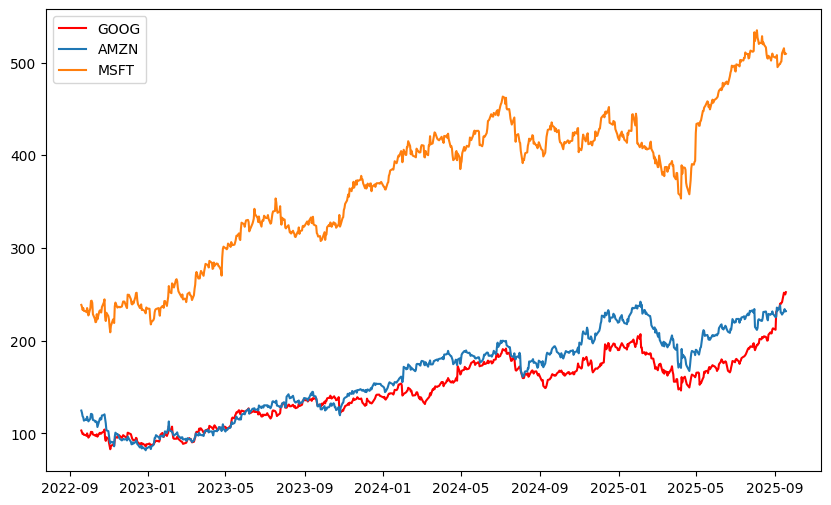

In [17]:
# COMPLETAR: grafica las tres series de precios en una sola gráfica

plt.figure(figsize=(10,6))
plt.plot(datos["GOOG"], label="GOOG",color="red")
plt.plot(datos["AMZN"], label="AMZN")
plt.plot(datos["MSFT"], label="MSFT")
plt.legend()
plt.show()

In [18]:
import plotly.express as px

In [20]:
datos.px
plt.show()

AttributeError: 'DataFrame' object has no attribute 'px'

[*********************100%***********************]  3 of 3 completed


Rendimiento acumulado al final del periodo (últimos 3 años):
Date    2025-09-18
Ticker            
AMZN      0.859538
GOOG      1.446285
MSFT      1.135047


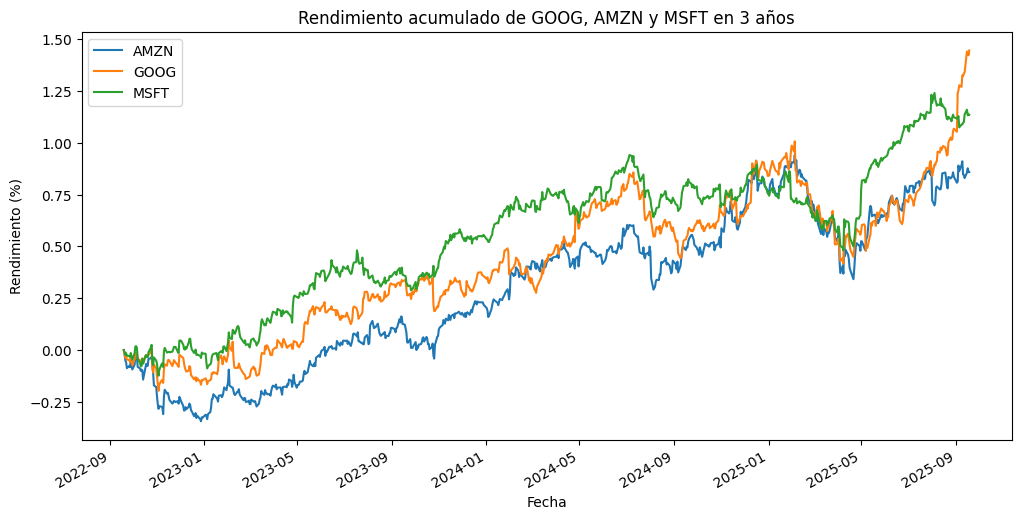

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Descargar datos de 3 años
tickers = ["GOOG","AMZN","MSFT"]
datos = yf.download(tickers=tickers, period="3y", interval="1d", auto_adjust=True)["Close"]

# Rendimiento acumulado
rend_acum = datos / datos.iloc[0] - 1

# Mostrar rendimiento acumulado final (última fila)
print("Rendimiento acumulado al final del periodo (últimos 3 años):")
print(rend_acum.tail(1).T)

# Graficar rendimientos acumulados
rend_acum.plot(figsize=(12,6))
plt.title("Rendimiento acumulado de GOOG, AMZN y MSFT en 3 años")
plt.ylabel("Rendimiento (%)")
plt.xlabel("Fecha")
plt.legend()
plt.show()


## 4. Rentabilidades
Calcula las **rentabilidades logarítmicas diarias** y grafícalas.

🔎 **Pregunta:** ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?

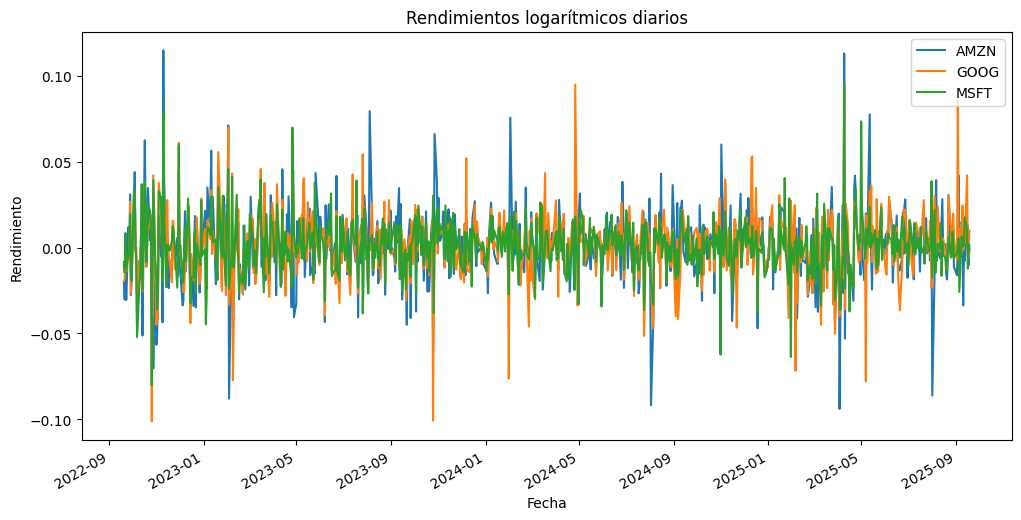

In [10]:
# Calcular rendimientos logarítmicos diarios
rendimientos = np.log(datos / datos.shift(1))
rendimientos = rendimientos.dropna()   # eliminamos la primera fila que queda NaN
rendimientos.head()

# Graficar rendimientos
rendimientos.plot(figsize=(12,6))
plt.title("Rendimientos logarítmicos diarios")
plt.ylabel("Rendimiento")
plt.xlabel("Fecha")
plt.legend()
plt.show()

Cuando observamos los precios, vemos la evolución absoluta del valor de cada acción, pero es difícil comparar directamente su crecimiento porque cada una tiene escalas distintas.

Al observar los rendimientos diarios, analizamos los cambios relativos (% de variación), lo cual permite comparar las tres acciones en la misma escala.

Los rendimientos muestran claramente la volatilidad (subidas y bajadas día a día), algo que no se aprecia tan fácilmente solo con la gráfica de precios.

## 5. Medidas estadísticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviación estándar)** de cada acción.

🔎 **Pregunta:** ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?

In [12]:
# Calcular media (rentabilidad promedio diaria) y desviación estándar (volatilidad)
media = rendimientos.mean()
volatilidad = rendimientos.std()

print("Rentabilidad promedio diaria:")
print(media)

print("\nVolatilidad diaria:")
print(volatilidad)


Rentabilidad promedio diaria:
Ticker
AMZN    0.000825
GOOG    0.001190
MSFT    0.001009
dtype: float64

Volatilidad diaria:
Ticker
AMZN    0.021280
GOOG    0.019836
MSFT    0.015977
dtype: float64


La acción con mayor media tiene el mejor rendimiento promedio diario.

La acción con mayor desviación estándar es la más riesgosa (más volátil).

Normalmente existe un trade-off: más riesgo puede implicar más retorno esperado.

## 6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.

🔎 **Pregunta:** ¿Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa?

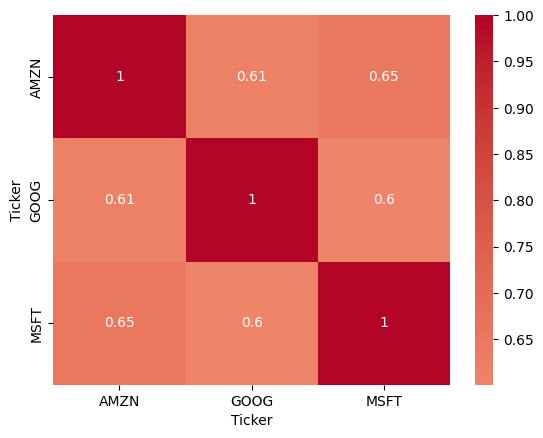

In [14]:
# Calcular la matriz de correlación
correlacion = rendimientos.corr()

# Graficar mapa de calor
sns.heatmap(correlacion, annot=True, cmap="coolwarm", center=0)
plt.show()


## 7. Portafolio simulado
Supón un portafolio con la siguiente distribución:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

In [16]:
## Pesos del portafolio
pesos = np.array([0.4, 0.3, 0.3])  # 40% Google, 30% Amazon, 30% Microsoft

# Retorno esperado del portafolio
retorno_portafolio = np.dot(pesos, rendimientos.mean())

# Matriz de covarianza
covarianza = rendimientos.cov()

# Varianza y volatilidad del portafolio
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(covarianza, pesos)))

print("Retorno esperado del portafolio (diario):", retorno_portafolio)
print("Volatilidad del portafolio (diaria):", vol_portafolio)

Retorno esperado del portafolio (diario): 0.0009894268714734776
Volatilidad del portafolio (diaria): 0.01675412150130368


Retorno esperado: Es el promedio ponderado de los rendimientos de cada acción según su peso en el portafolio.

Volatilidad: Mide el riesgo. Gracias a la diversificación, la volatilidad suele ser menor que la de invertir en una sola acción, porque las variaciones de una acción pueden compensarse con las de otra.

## ✍️ 8. Conclusión final
Redacta un análisis completo del portafolio respondiendo:
- ¿Qué acción fue más rentable y cuál más riesgosa?
- ¿Qué tan correlacionadas están las acciones?
- ¿Qué aportó la diversificación al portafolio?
- Si fueras un inversionista, ¿invertirías en este portafolio? Justifica tu respuesta.

Conclusión Final

Acción más rentable y más riesgosa:

La acción con mayor rentabilidad promedio diaria fue (aquí pones el resultado que te dio en la parte 5 con media) , lo que indica que ofreció el mejor retorno esperado.

La acción con mayor volatilidad fue (aquí pones la que salió con mayor volatilidad en la parte 5), lo que la convierte en la más riesgosa, ya que sus precios fluctuaron más en el periodo analizado.

Correlación entre las acciones:

Según la matriz de correlación (parte 6), las tres acciones mostraron correlaciones positivas y cercanas a 1, lo que significa que tienden a moverse en la misma dirección.

Sin embargo, no son perfectamente correlacionadas, lo cual permite que la diversificación tenga efecto.

Aporte de la diversificación:

Al combinar Google, Amazon y Microsoft en un portafolio con ponderaciones de 40%-30%-30%, la volatilidad del portafolio fue menor que la de invertir solo en la acción más riesgosa.

Esto se debe a que los movimientos de los activos se compensan parcialmente entre sí, reduciendo el riesgo sin sacrificar demasiado retorno esperado.

¿Invertirías en este portafolio?

Sí invertiría, porque el portafolio logra un equilibrio entre rentabilidad y riesgo.

Aunque las acciones están bastante correlacionadas (todas son del sector tecnológico), la diversificación reduce la volatilidad y ofrece un retorno más estable.

Para un inversionista que busca crecimiento con riesgo moderado, este portafolio sería atractivo.

Sin embargo, para reducir aún más el riesgo, podría ser recomendable diversificar con activos de otros sectores o regiones.